### Libraries Importing

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
print("Libraries imported")

Libraries imported


### Data loading 

In [66]:
df =pd.read_csv("data/feature_selection.csv")
X = df.drop(columns="y")
#ROC can't work on multiclass classification so gathered all postive classes as one
y = df["y"].apply(lambda x: 1 if x > 0 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### Function to evaluate and visualize the performance

In [67]:
def model_evaluation(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    eval = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds, 'roc_auc': roc_auc, 'accuracy': accuracy_score(y_test, y_pred), 'precision': precision_score(y_test, y_pred),'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred)}
    
    
    print("Accuracy Score: ", eval['accuracy'] *100)
    print("precision :" , eval['precision']*100)
    print("recall :", eval['recall']*100)
    print("f1 score :", eval['f1']*100)
    
    print("roc_auc :", roc_auc*100)
    plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
    
    plt.plot(eval['fpr'], eval['tpr'], label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# --- Plot Customizations ---
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return eval

### Logistic Regression model

Accuracy Score:  77.04918032786885
precision : 77.77777777777779
recall : 72.41379310344827
f1 score : 75.0
roc_auc : 88.14655172413792


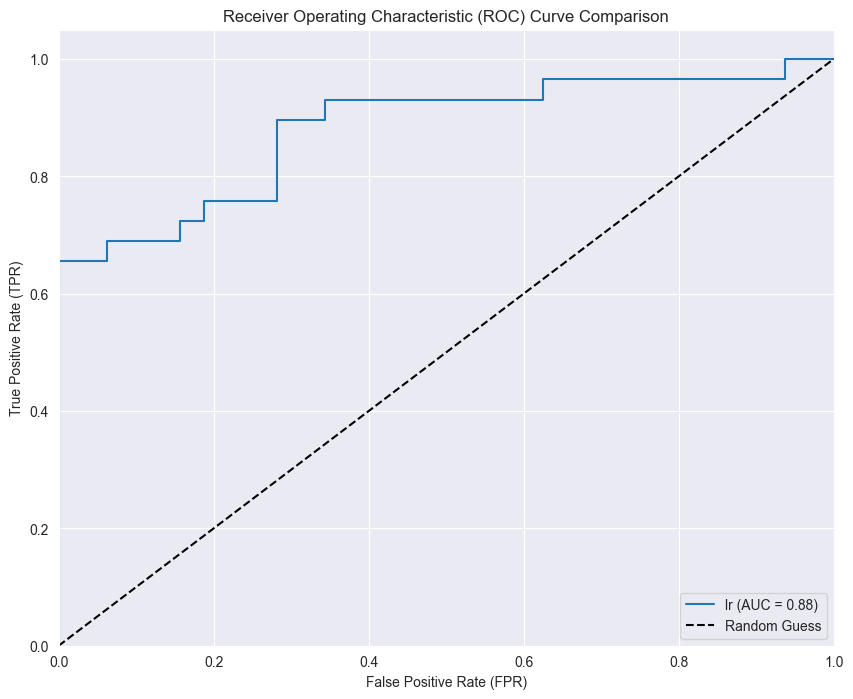

In [68]:
lr = LogisticRegression(max_iter=1000)
eval_lr = model_evaluation(lr, "lr")


### SVM model

Accuracy Score:  73.77049180327869
precision : 72.41379310344827
recall : 72.41379310344827
f1 score : 72.41379310344827
roc_auc : 88.57758620689656


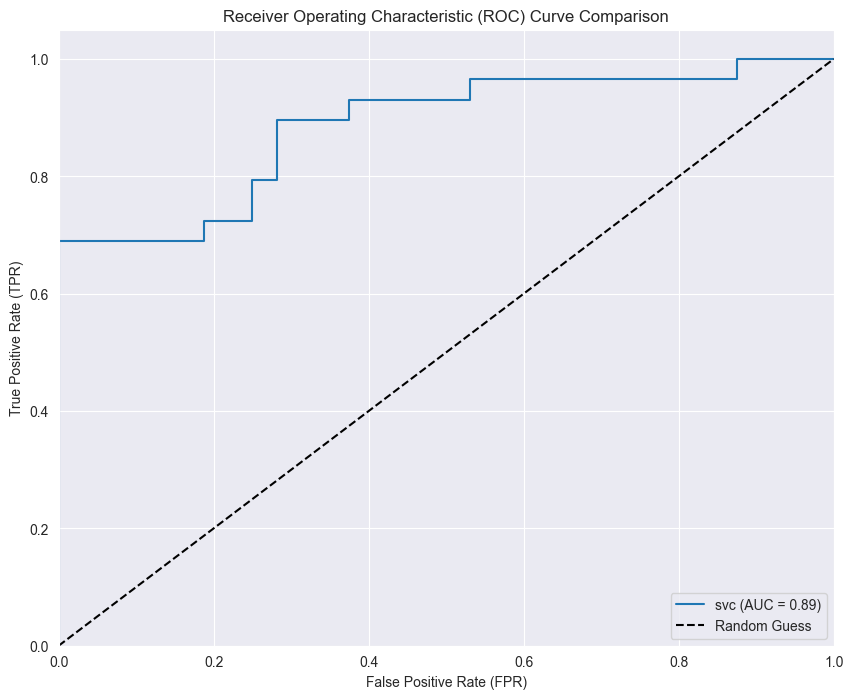

In [69]:
svc = SVC(probability=True, random_state=30)
eval_svc = model_evaluation(svc, "svc")

### Decision Tree model

Accuracy Score:  70.49180327868852
precision : 72.0
recall : 62.06896551724138
f1 score : 66.66666666666666
roc_auc : 70.09698275862068


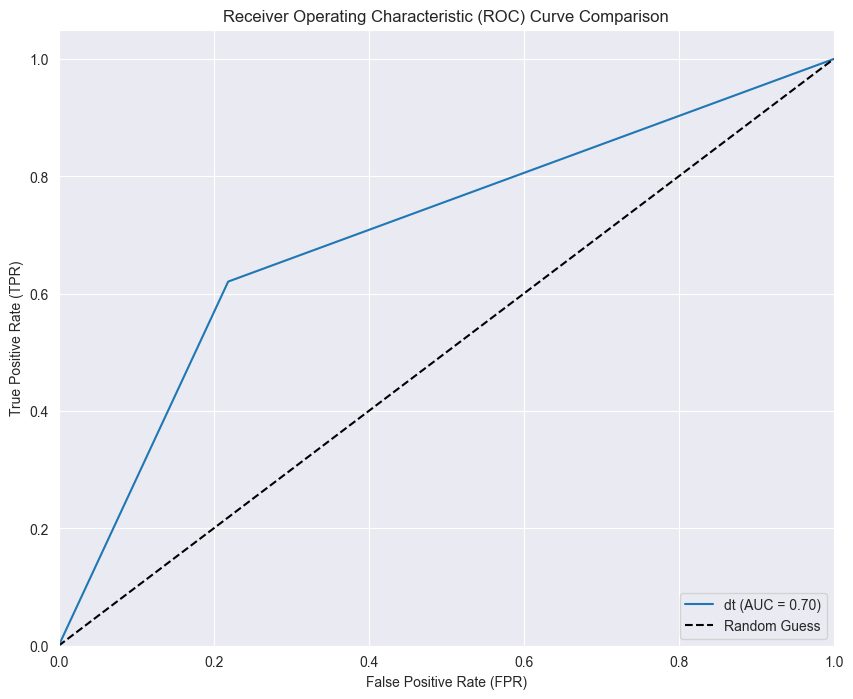

In [70]:
dt = DecisionTreeClassifier(random_state=30)
eval_dt = model_evaluation(dt, "dt")

### Random Forest model

Accuracy Score:  80.32786885245902
precision : 84.0
recall : 72.41379310344827
f1 score : 77.77777777777779
roc_auc : 89.76293103448276


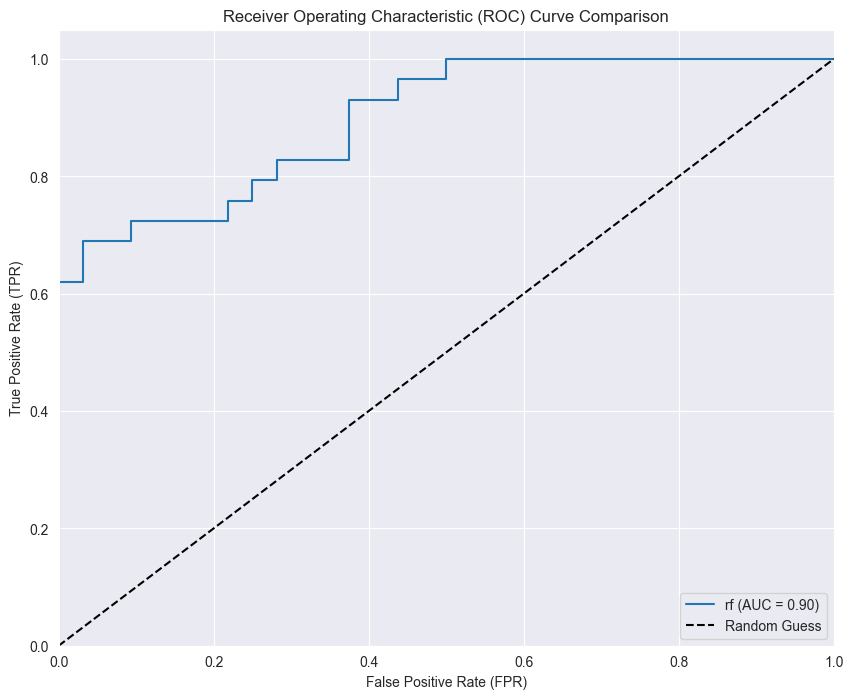

In [71]:
rf = RandomForestClassifier(random_state=30, n_estimators=1000)
eval_rf = model_evaluation(rf, "rf")